<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Regularization_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
Data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [5]:
Data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# One Hot Encoding...
Data=pd.get_dummies(Data,columns=["country","gender"],drop_first=True)

In [7]:
Data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
X=Data.drop(columns=["churn"])
Y=Data[["churn"]]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)

(8000, 12)
(8000, 1)


In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [11]:
print(X_train_scaled.shape)

(8000, 12)


In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Without Regularization..

In [13]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(50,activation="relu",input_dim=12))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))

#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [14]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [16]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=800,validation_split=0.2)

Epoch 1/800
200/200 [==============================] - 7s 5ms/step - loss: 0.1378 - accuracy: 0.8170 - val_loss: 0.1363 - val_accuracy: 0.8175
Epoch 2/800
200/200 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.8528 - val_loss: 0.1246 - val_accuracy: 0.8300
Epoch 3/800
200/200 [==============================] - 1s 4ms/step - loss: 0.1063 - accuracy: 0.8619 - val_loss: 0.1242 - val_accuracy: 0.8369
Epoch 4/800
200/200 [==============================] - 1s 5ms/step - loss: 0.1021 - accuracy: 0.8661 - val_loss: 0.1232 - val_accuracy: 0.8288
Epoch 5/800
200/200 [==============================] - 1s 5ms/step - loss: 0.0991 - accuracy: 0.8706 - val_loss: 0.1197 - val_accuracy: 0.8425
Epoch 6/800
200/200 [==============================] - 1s 5ms/step - loss: 0.0970 - accuracy: 0.8706 - val_loss: 0.1241 - val_accuracy: 0.8388
Epoch 7/800
200/200 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.8727 - val_loss: 0.1195 - val_accuracy: 0.8400

In [17]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [18]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

-0.3881794245421888

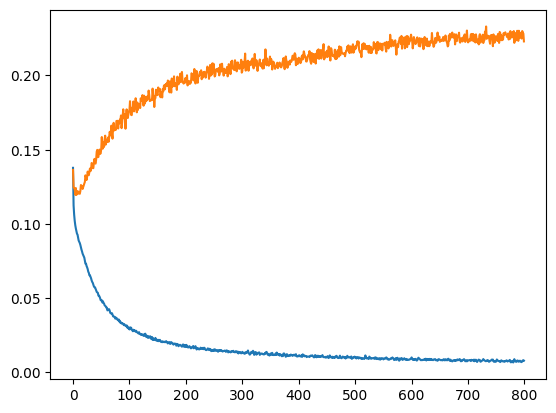

In [19]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

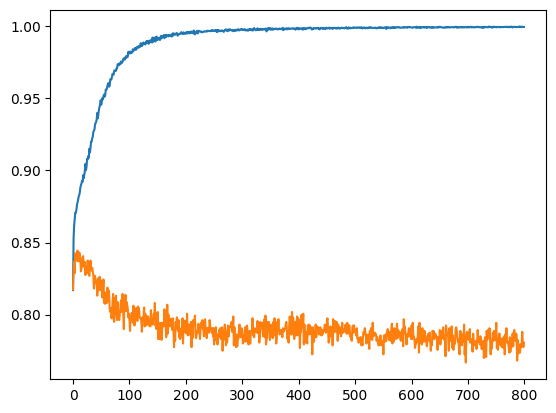

In [20]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# With Regulaization L1...

In [21]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(50,activation="relu",input_dim=12,kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(50,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(50,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [22]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                650       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [24]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=400,validation_split=0.2)

Epoch 1/400
200/200 [==============================] - 3s 5ms/step - loss: 0.6862 - accuracy: 0.8166 - val_loss: 0.5383 - val_accuracy: 0.8244
Epoch 2/400
200/200 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.8484 - val_loss: 0.3658 - val_accuracy: 0.8338
Epoch 3/400
200/200 [==============================] - 1s 4ms/step - loss: 0.3004 - accuracy: 0.8556 - val_loss: 0.2692 - val_accuracy: 0.8419
Epoch 4/400
200/200 [==============================] - 1s 4ms/step - loss: 0.2263 - accuracy: 0.8559 - val_loss: 0.2134 - val_accuracy: 0.8413
Epoch 5/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1832 - accuracy: 0.8572 - val_loss: 0.1878 - val_accuracy: 0.8375
Epoch 6/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1596 - accuracy: 0.8611 - val_loss: 0.1652 - val_accuracy: 0.8425
Epoch 7/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1454 - accuracy: 0.8620 - val_loss: 0.1562 - val_accuracy: 0.8406

In [25]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [26]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.33879503559729585

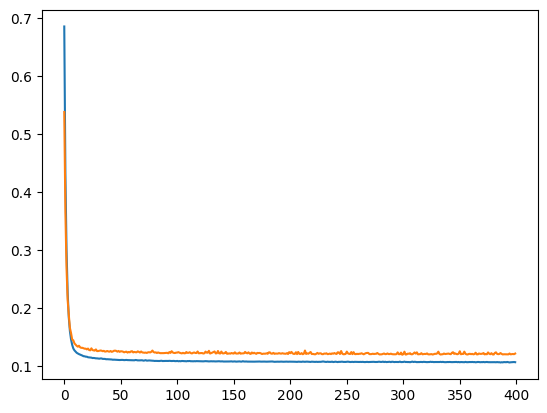

In [27]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

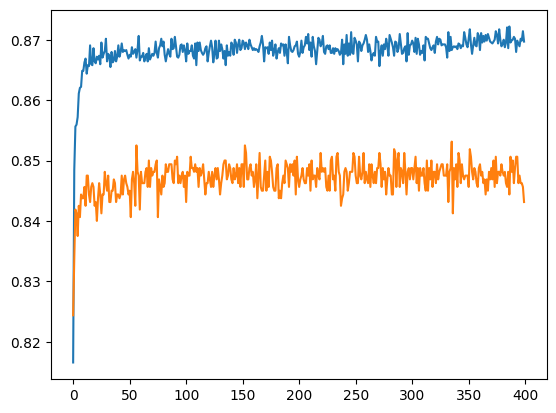

In [28]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# With Regularization L2...

In [29]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(50,activation="relu",input_dim=12,kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(50,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(Dense(50,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [30]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                650       
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [32]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=400,validation_split=0.2)

Epoch 1/400
200/200 [==============================] - 3s 5ms/step - loss: 0.3195 - accuracy: 0.8205 - val_loss: 0.2835 - val_accuracy: 0.8188
Epoch 2/400
200/200 [==============================] - 1s 4ms/step - loss: 0.2524 - accuracy: 0.8505 - val_loss: 0.2484 - val_accuracy: 0.8350
Epoch 3/400
200/200 [==============================] - 1s 4ms/step - loss: 0.2181 - accuracy: 0.8609 - val_loss: 0.2179 - val_accuracy: 0.8400
Epoch 4/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1923 - accuracy: 0.8645 - val_loss: 0.1956 - val_accuracy: 0.8444
Epoch 5/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1731 - accuracy: 0.8664 - val_loss: 0.1788 - val_accuracy: 0.8425
Epoch 6/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1575 - accuracy: 0.8686 - val_loss: 0.1650 - val_accuracy: 0.8500
Epoch 7/400
200/200 [==============================] - 1s 4ms/step - loss: 0.1459 - accuracy: 0.8711 - val_loss: 0.1569 - val_accuracy: 0.8475

In [33]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [34]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.3657341484287596

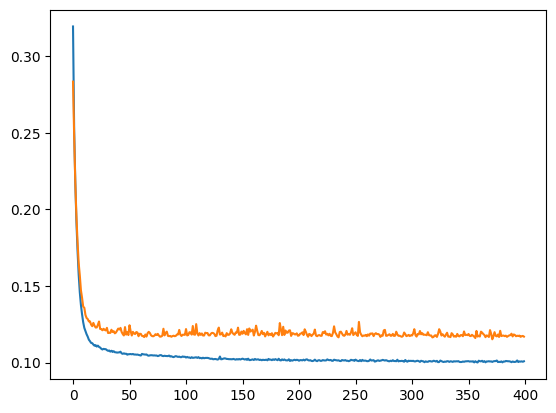

In [35]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

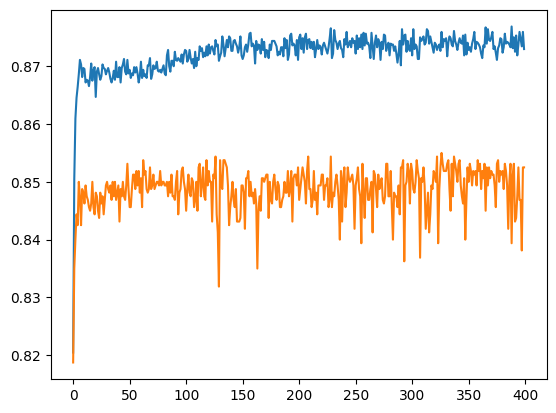

In [36]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()